### GRU Model Training

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

c:\Users\roji2\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\roji2\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\roji2\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [3]:
import numpy as np
import pandas as pd

# Load the dataset using absolute Windows paths
x = np.load(r'D:\ProgonsAI\milestone_2\week_4\Day_16\rolling_window_sequences.npy')
metadata = pd.read_csv(r'D:\ProgonsAI\milestone_2\week_4\Day_16\sequence_metadata_with_RUL.csv')

y = metadata['RUL']

print("Features Shape:", x.shape)
print("Target Shape:", y.shape)


Features Shape: (152559, 30, 66)
Target Shape: (152559,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    x, y,
    test_size=0.3,
    random_state=42
)

print("Train X shape:", X_train.shape)
print("Val X shape:", X_val.shape)


Train X shape: (106791, 30, 66)
Val X shape: (45768, 30, 66)


In [7]:
# Define GRU model creation function
def create_gru_model(input_shape, units=64, learning_rate=0.001, dropout_rate=0.2):
  model = Sequential()
  model.add(GRU(units, input_shape=input_shape))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1))
  optimizer = Adam(learning_rate=learning_rate)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
  return model

In [8]:
# Create the model
model = create_gru_model(input_shape=(X_train.shape[1], X_train.shape[2]), units=64, learning_rate=0.001, dropout_rate=0.2)

# callbacks for early stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

c:\Users\roji2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - loss: 20620.3301 - mae: 114.6481 - val_loss: 12771.5381 - val_mae: 87.4846
Epoch 2/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - loss: 10081.2383 - mae: 77.9793 - val_loss: 7297.0732 - val_mae: 63.9390
Epoch 3/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - loss: 5448.7432 - mae: 53.7217 - val_loss: 4297.9058 - val_mae: 46.8881
Epoch 4/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - loss: 4004.1924 - mae: 46.6398 - val_loss: 3655.0557 - val_mae: 44.4911
Epoch 5/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - loss: 3628.8401 - mae: 44.8692 - val_loss: 3380.1516 - val_mae: 43.7720
Epoch 6/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - loss: 3428.7349 - mae: 43.7595 - val_loss: 3307.3225 - val_mae: 42.3657
Epoch 7/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - loss: 3306.8618 - mae: 43.0467 - val_loss: 3068.0066 - val_mae: 41.2490
Epoch 8/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - loss: 3161.2354 - mae: 42.05

In [10]:
# Evaluate on validation set
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation MSE: {val_loss:.4f}, MAE: {val_mae:.4f}')

# Predict on test set
y_pred = model.predict(X_val).flatten()

# Calculate test MSE
test_mse = mean_squared_error(y_val, y_pred)
print(f'Test MSE: {test_mse:.4f}')

Validation MSE: 1524.5872, MAE: 29.0607
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Test MSE: 1524.5854


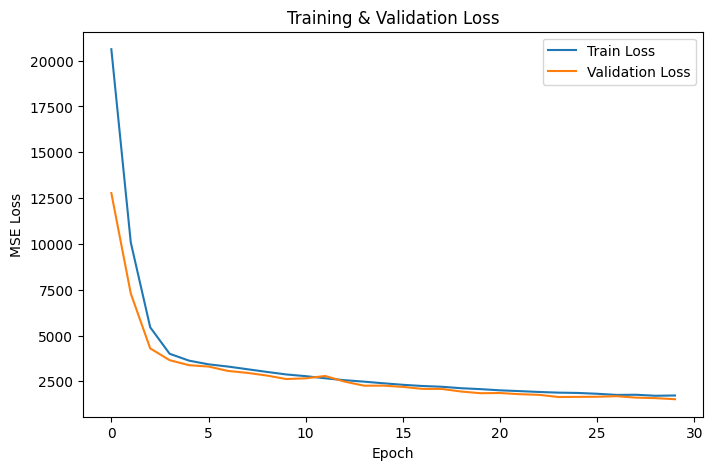

In [11]:
# Training and Validation Curves
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

## Observations

- Validation loss stabilized early, showing good model convergence.

- Training and validation loss curves are aligned, indicating no overfitting.

- Validation MAE shows the model can reasonably predict RUL trends.

- GRU architecture successfully captured temporal dependencies in the data.

- Predicted RUL values follow the expected decreasing pattern on the validation set.